In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_count = len(list(glob(r'/content/drive/MyDrive/states_dataset_2.1/train*.jpg')))
keras.utils.set_random_seed(1)

batch_size = 32
img_height = 227
img_width = 227
num_classes = 11
train_datagen = ImageDataGenerator(
                                  shear_range=0.2,
                                  zoom_range=0.2, 
                                  horizontal_flip=True,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  validation_split=0.01
                                  )
image_size = (227, 227)

validation_gen = ImageDataGenerator(validation_split=0.99)
training_set = train_datagen.flow_from_directory(  r'/content/drive/MyDrive/states_dataset_2.1/train',
                                                seed=101,                                                 
                                                target_size=image_size,
                                                batch_size=32,
                                                subset = "training",
                                                class_mode='sparse')
validation_set = validation_gen.flow_from_directory(  r'/content/drive/MyDrive/states_dataset_2.1/valid', 
                                            target_size=image_size,
                                            batch_size=32, 
                                            subset = "validation",
                                            class_mode='sparse')
val_ds = tf.keras.utils.image_dataset_from_directory(
  r'/content/drive/MyDrive/states_dataset_2.1/valid',
  validation_split=0.99,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
train_ds = tf.keras.utils.image_dataset_from_directory(
r'/content/drive/MyDrive/states_dataset_2.1/train',
validation_split=0.001,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 8520 images belonging to 11 classes.
Found 1888 images belonging to 11 classes.
Found 1912 files belonging to 11 classes.
Using 1892 files for validation.
Found 8599 files belonging to 11 classes.
Using 8591 files for training.


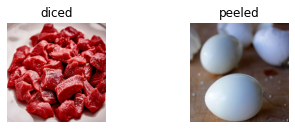

In [ ]:
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(2):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
#best model
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  # layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  # layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # tf.keras.layers.Dropout(0.5),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  # layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  # layers.Conv2D(256, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # tf.keras.layers.Dropout(0.5),
  # layers.Conv2D(128, 3, padding='same', activation='relu'),
  # # layers.Conv2D(64, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  # tf.keras.layers.Dropout(0.6),
  # layers.Conv2D(512, 3, padding='same', activation='relu'),
  # layers.Conv2D(128, 3, padding='same', activation='relu'),
  # layers.Conv2D(128, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.6),



  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 227, 227, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       7

In [ ]:
tf.keras.backend.clear_session()

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# callback = EarlyStopping(monitor='loss', patience=3)
# epochs=100
history = model.fit(
  training_set,
  validation_data= val_ds,
  epochs=20
)



Epoch 1/20
267/267 [==============================] - 6670s 25s/step - loss: 2.3807 - accuracy: 0.1256 - val_loss: 2.3938 - val_accuracy: 0.1052
Epoch 2/20
267/267 [==============================] - 191s 716ms/step - loss: 2.3452 - accuracy: 0.1356 - val_loss: 2.3134 - val_accuracy: 0.1533
Epoch 3/20
267/267 [==============================] - 188s 705ms/step - loss: 2.2584 - accuracy: 0.1808 - val_loss: 2.2052 - val_accuracy: 0.1908
Epoch 4/20
267/267 [==============================] - 187s 701ms/step - loss: 2.1745 - accuracy: 0.2034 - val_loss: 2.2039 - val_accuracy: 0.1897
Epoch 5/20
267/267 [==============================] - 188s 704ms/step - loss: 2.1334 - accuracy: 0.2164 - val_loss: 2.1921 - val_accuracy: 0.1897
Epoch 6/20
267/267 [==============================] - 188s 702ms/step - loss: 2.1107 - accuracy: 0.2357 - val_loss: 2.0644 - val_accuracy: 0.2389
Epoch 7/20
267/267 [==============================] - 189s 709ms/step - loss: 2.0795 - accuracy: 0.2462 - val_loss: 2.0892 - 

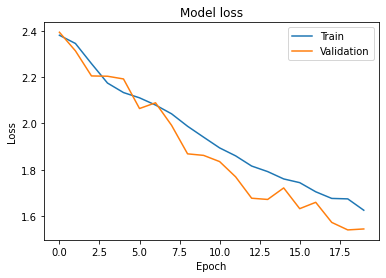

In [ ]:
# Plot the validation and test loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
model.save('nikil.h5')

**TEST SCRIPT**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the trained model
model = tf.keras.models.load_model('nikil.h5')
class_names=['creamy_paste', 'diced', 'floured', 'grated', 'juiced', 'jullienne', 'mixed', 'other', 'peeled', 'sliced', 'whole']


batch_size = 32
img_height = 227
img_width = 227
num_classes = 11
image_size = (227, 227)


test_ds = tf.keras.utils.image_dataset_from_directory(
r'/content/drive/MyDrive/states_dataset_2.1/test/test',
labels=None,
label_mode=None,
image_size=(img_height, img_width),
batch_size=batch_size)

# Train the model
history = model.predict(test_ds)
print(history)
np.argmax(history,axis=-1)
# Replace 'path/to/directory' with the path to the directory containing the JPEG files
image_dir = '/content/drive/MyDrive/states_dataset_2.1/test/test/anonymous'

# Get a list of all JPEG files in the directory
jpg_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Create a dictionary mapping each filename to a label
labels = {}
for i, filename in enumerate(jpg_files):
    label = np.argmax(history[i], axis=-1)
    labels[filename] = label



# Print the dictionary
print(labels)
#array = ['creamy_paste', 'diced', 'floured', 'grated', 'juiced', 'jullienne', 'mixed', 'other', 'peeled', 'sliced', 'whole']

for key in labels:
    index = labels[key]
    labels[key] = class_names[index]

print(labels)
# Write the dictionary to a JSON file
with open('/content/drive/MyDrive/states_dataset_2.1/labels.json', 'w') as f:
    json.dump(labels, f)







